In [10]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme()

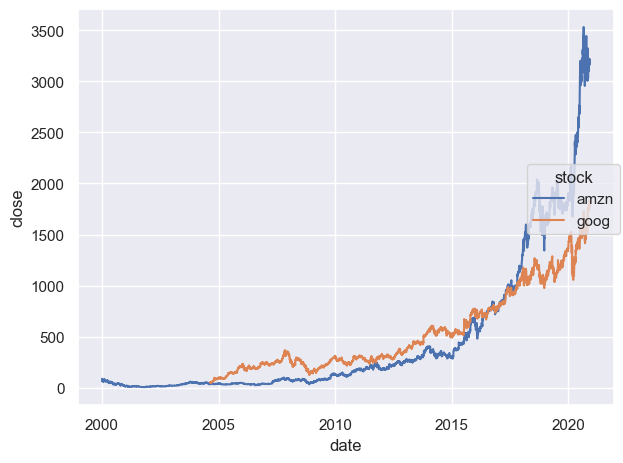

,x,y,yerr,cat
0,1,1,0.50,A
1,2,2,0.25,A
2,3,3,0.50,A
3,4,4,0.75,A
4,5,5,0.50,A
5,1,2,0.25,B
6,2,4,0.50,B
7,3,6,0.75,B
8,4,8,0.50,B
9,5,10,0.25,B


In [66]:

stocks = pd.read_csv("https://www.sharpsightlabs.com/datasets/amzn_goog_2000-01-01_to_2020-12-05.csv")
stocks.date = pd.to_datetime(stocks.date)

stocks.head()

import seaborn.objects as so

(so.Plot(data = stocks
         ,x = 'date'
         ,y = 'close'
         ,color = 'stock'
         )
   .add(so.Line())
 ).show()

df = pd.DataFrame({
    "x": [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    "y": [1, 2, 3, 4 ,5, 2, 4, 6, 8 ,10],
    "yerr": [0.5, 0.25, 0.5, 0.75, 0.5, 0.25, 0.5, 0.75, 0.5, 0.25],
    "cat": ["A"] * 5 + ["B"] * 5,
})

df.head(20)

In [12]:
# Get a list of all files which are .csv files in ../DOTSSimulator/Assets/SimulationResults
import os
files = [f for f in os.listdir('.') if f.endswith('.csv')]
# Sort the files descending
files.sort()

print(f'Found {len(files)} files')
print(f'Newest file: {files[0]}')
print(files)


Found 3 files
Newest file: 3-1-feeding-range-1.csv
['3-1-feeding-range-1.csv', '3-2-feeding-range-10.csv', '3-3-up-feeding-rate.csv']


In [13]:
results_df: pd.DataFrame = pd.read_csv(files[0])
# Print basic information about the dataframe
print(results_df.info())

results_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Step                1279 non-null   int64  
 1   TimeStamp           1279 non-null   float64
 2   AvgEnergy           1279 non-null   float64
 3   NoBoids             1279 non-null   int64  
 4   NoFoodSources       1279 non-null   int64  
 5   TotalFoodAvailable  1279 non-null   float64
 6   Polarization        1279 non-null   float64
 7   Expanse             1279 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 80.1 KB
None


,Step,TimeStamp,AvgEnergy,NoBoids,NoFoodSources,TotalFoodAvailable,Polarization,Expanse
0,0,0.000999,384.0014,25,1,450.0359,0.458060,0.742884
1,1,29.999510,384.0545,25,1,450.8535,0.474646,0.629613
2,2,59.999530,384.1080,25,1,451.6587,0.484118,0.715302
3,3,89.999530,384.1613,25,1,452.4706,0.466635,0.903536
4,4,119.999500,384.2142,25,1,453.2919,0.426313,0.449123


In [103]:
# Configuration:

truncated_df_1 = results_df.iloc[1:361]

print(truncated_df_1.describe())

truncated_df_1['AvgEnergy_ymin'] = truncated_df_1['AvgEnergy'] - 10
truncated_df_1['AvgEnergy_ymax'] = truncated_df_1['AvgEnergy'] + 15

truncated_df_1['TotalFoodAvailable_ymin'] = truncated_df_1['TotalFoodAvailable'] - 10
truncated_df_1['TotalFoodAvailable_ymax'] = truncated_df_1['TotalFoodAvailable'] + 15

truncated_df_1.info()
truncated_df_1.head()

             Step     TimeStamp   AvgEnergy  NoBoids  NoFoodSources  \
count  360.000000    360.000000  360.000000    360.0          360.0   
mean   180.500000   5415.040548  402.178897     25.0            1.0   
std    104.067286   3122.069092   10.375772      0.0            0.0   
min      1.000000     29.999180  384.103700     25.0            1.0   
25%     90.750000   2722.497250  393.207250     25.0            1.0   
50%    180.500000   5414.997000  402.315650     25.0            1.0   
75%    270.250000   8107.633000  411.237850     25.0            1.0   
max    360.000000  10800.130000  419.681600     25.0            1.0   

       TotalFoodAvailable  Polarization     Expanse  
count          360.000000    360.000000  360.000000  
mean           382.607662      0.478045    0.893826  
std             36.442640      0.019044    0.201217  
min            329.904500      0.367071    0.311953  
25%            348.566875      0.469665    0.755758  
50%            379.188850      0.483

C:\Users\Niels\AppData\Local\Temp\ipykernel_38944\1438190407.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  truncated_df_1['AvgEnergy_ymin'] = truncated_df_1['AvgEnergy'] - 10
C:\Users\Niels\AppData\Local\Temp\ipykernel_38944\1438190407.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  truncated_df_1['AvgEnergy_ymax'] = truncated_df_1['AvgEnergy'] + 15
C:\Users\Niels\AppData\Local\Temp\ipykernel_38944\1438190407.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,Step,TimeStamp,AvgEnergy,NoBoids,NoFoodSources,TotalFoodAvailable,Polarization,Expanse,AvgEnergy_ymin,AvgEnergy_ymax,TotalFoodAvailable_ymin,TotalFoodAvailable_ymax
1,1,29.99918,384.1037,25,1,449.6233,0.474646,0.629613,374.1037,399.1037,439.6233,464.6233
2,2,59.99982,384.2047,25,1,449.2429,0.487753,0.919586,374.2047,399.2047,439.2429,464.2429
3,3,89.99883,384.3051,25,1,448.8765,0.480646,1.115695,374.3051,399.3051,438.8765,463.8765
4,4,119.99980,384.4066,25,1,448.4834,0.482156,0.739452,374.4066,399.4066,438.4834,463.4834
5,5,149.99880,384.5075,25,1,448.1037,0.492480,0.892603,374.5075,399.5075,438.1037,463.1037


In [114]:
metrics = ['AvgEnergy', 'TotalFoodAvailable']

melted = pd.melt(truncated_df_1, id_vars=['Step'], value_vars=metrics, var_name='Metric', value_name='Value')

ymin = []
ymax = []
for name in metrics:
    print(name)
    # print(group)
    print(truncated_df_1[f"{name}_ymin"])
    ymin.extend(truncated_df_1[f"{name}_ymin"].to_numpy())
    ymax.extend(truncated_df_1[f"{name}_ymax"].to_numpy())
    pass

melted['ymin'] = ymin
melted['ymax'] = ymax

melted.head()

AvgEnergy
1      374.1037
2      374.2047
3      374.3051
4      374.4066
5      374.5075
         ...   
356    409.3078
357    409.4013
358    409.4942
359    409.5886
360    409.6816
Name: AvgEnergy_ymin, Length: 360, dtype: float64
TotalFoodAvailable
1      439.6233
2      439.2429
3      438.8765
4      438.4834
5      438.1037
         ...   
356    320.6732
357    320.4800
358    320.3029
359    320.0872
360    319.9045
Name: TotalFoodAvailable_ymin, Length: 360, dtype: float64


,Step,Metric,Value,ymin,ymax
0,1,AvgEnergy,384.1037,374.1037,399.1037
1,2,AvgEnergy,384.2047,374.2047,399.2047
2,3,AvgEnergy,384.3051,374.3051,399.3051
3,4,AvgEnergy,384.4066,374.4066,399.4066
4,5,AvgEnergy,384.5075,374.5075,399.5075


In [115]:
melted.tail()

,Step,Metric,Value,ymin,ymax
715,356,TotalFoodAvailable,330.6732,320.6732,345.6732
716,357,TotalFoodAvailable,330.4800,320.4800,345.4800
717,358,TotalFoodAvailable,330.3029,320.3029,345.3029
718,359,TotalFoodAvailable,330.0872,320.0872,345.0872
719,360,TotalFoodAvailable,329.9045,319.9045,344.9045


<Figure size 1500x500 with 0 Axes>

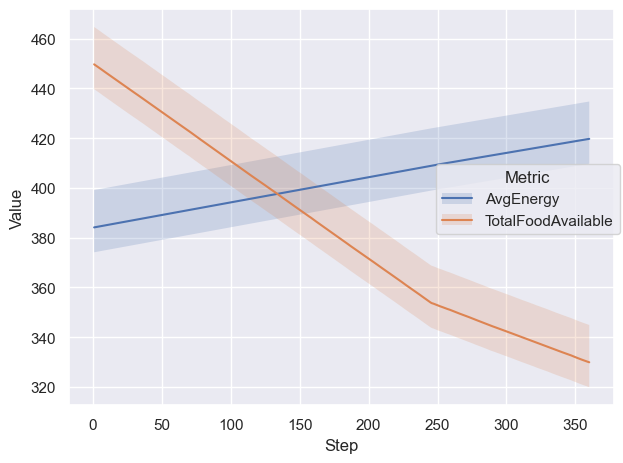

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


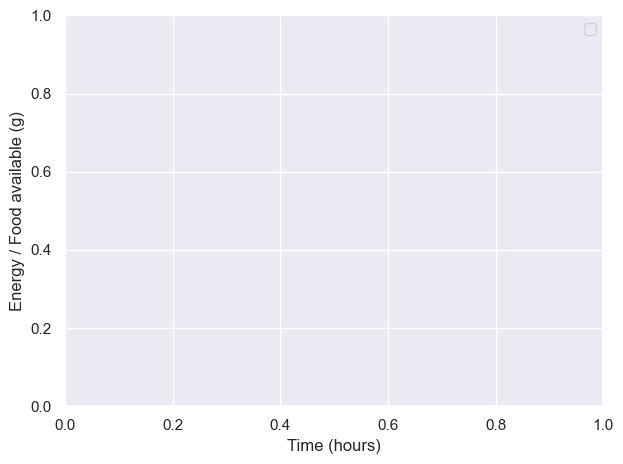

In [117]:
fig = plt.figure(figsize=(15, 5))





import seaborn.objects as so
# sns.lineplot(data=truncated_df_1, x='Step', y='TotalFoodAvailable', color='red', label='Total Food Available')
# sns.lineplot(data=truncated_df_1, x='Step', y='AvgEnergy', color='blue', label='Average Energy')
p = (
    so.Plot(data=melted, x='Step', y='Value', color='Metric', ymin='ymin', ymax='ymax')
        .add(so.Line())
        .add(so.Band())

)
p.show()
plt.xlabel('Time (hours)')
plt.ylabel('Energy / Food available (g)')
plt.tight_layout()
plt.legend()
 
plt.savefig('plots/exp3-Environment-1.pdf')

In [16]:
# Compute coefficient in avg energy
min_food = truncated_df_1['TotalFoodAvailable'].min()
max_food = truncated_df_1['TotalFoodAvailable'].max()
print(f'Min food available: {min_food}')
print(f'Max food available: {max_food}')
print(f'Coefficient: {(max_food - min_food) / 30}')

# Compute coefficient in avg energy
min_energy = truncated_df_1['AvgEnergy'].min()
max_energy = truncated_df_1['AvgEnergy'].max()
print(f'Min energy: {min_energy}')
print(f'Max energy: {max_energy}')
coeff = (max_energy - min_energy) / 30
print(f'Coefficient: {(max_energy - min_energy) / 30}')

Min food available: 450.8535
Max food available: 747.3796
Coefficient: 9.884203333333334
Min energy: 384.0545
Max energy: 402.9826
Coefficient: 0.6309366666666657


In [17]:
results_df: pd.DataFrame = pd.read_csv(files[1])
truncated_df_2 = results_df.iloc[1:361]

print(truncated_df_2.describe())
truncated_df_2.info()
truncated_df_2.head()

             Step     TimeStamp   AvgEnergy  NoBoids  NoFoodSources  \
count  360.000000    360.000000  360.000000    360.0          360.0   
mean   180.500000  10830.169933  399.480194     25.0            1.0   
std    104.067286   6244.311044    8.925215      0.0            0.0   
min      1.000000     59.871060  384.085600     25.0            1.0   
25%     90.750000   5444.872000  391.782875     25.0            1.0   
50%    180.500000  10830.010000  399.480200     25.0            1.0   
75%    270.250000  16215.560000  407.177525     25.0            1.0   
max    360.000000  21600.560000  414.874800     25.0            1.0   

       TotalFoodAvailable  Polarization     Expanse  
count        3.600000e+02    360.000000  360.000000  
mean         4.500047e+02      0.465823    0.776289  
std          1.138451e-13      0.025028    0.168138  
min          4.500047e+02      0.360959    0.331554  
25%          4.500047e+02      0.452190    0.669307  
50%          4.500047e+02      0.471

,Step,TimeStamp,AvgEnergy,NoBoids,NoFoodSources,TotalFoodAvailable,Polarization,Expanse
1,1,59.87106,384.0856,25,1,450.0047,0.469230,0.709151
2,2,119.87110,384.1713,25,1,450.0047,0.454103,0.590944
3,3,179.87110,384.2571,25,1,450.0047,0.446927,0.785945
4,4,239.87110,384.3429,25,1,450.0047,0.445897,0.894300
5,5,299.87110,384.4286,25,1,450.0047,0.488847,0.713243


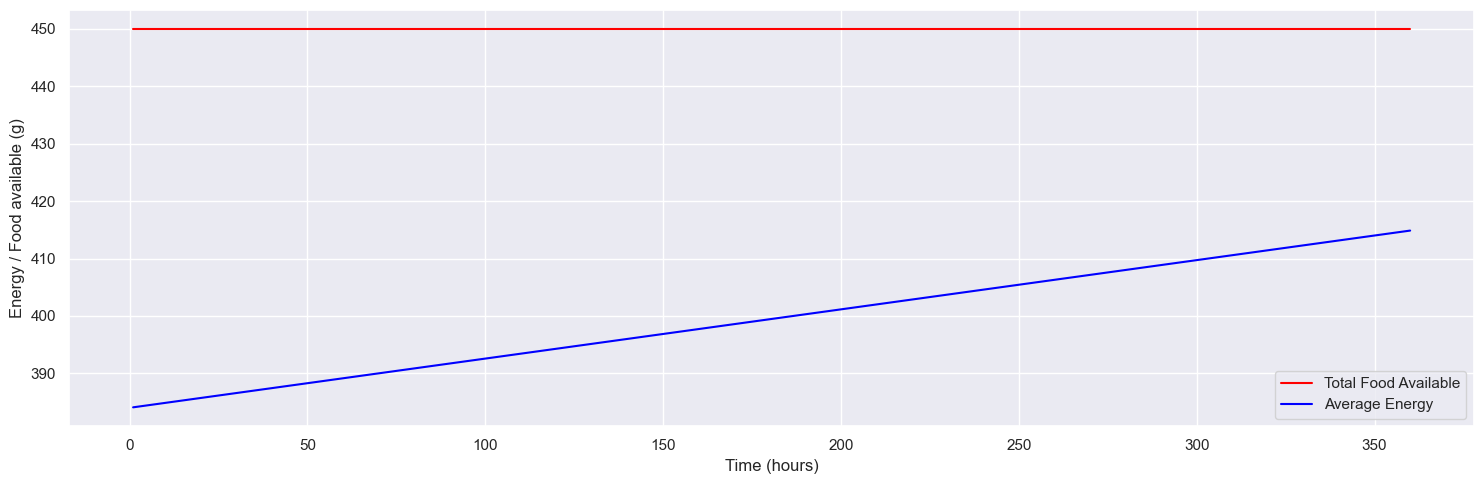

In [18]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot()
sns.lineplot(data=truncated_df_2, x='Step', y='TotalFoodAvailable', color='red', ax=ax, label='Total Food Available')
sns.lineplot(data=truncated_df_2, x='Step', y='AvgEnergy', color='blue', ax=ax, label='Average Energy')
plt.xlabel('Time (hours)')
plt.ylabel('Energy / Food available (g)')
plt.tight_layout()
plt.legend()
 
plt.savefig('plots/exp3-Environment-2.pdf')

In [19]:
# Compute coefficient in avg energy
min_food_2 = truncated_df_2['TotalFoodAvailable'].min()
max_food_2 = truncated_df_2['TotalFoodAvailable'].max()
print(f'Min food available: {min_food_2}')
print(f'Max food available: {max_food_2}')
print(f'Coefficient: {(max_food_2 - min_food_2) / 15}')

# Compute coefficient in avg energy
min_energy_2 = truncated_df_2['AvgEnergy'].min()
max_energy_2 = truncated_df_2['AvgEnergy'].max()
print(f'Min energy: {min_energy_2}')
print(f'Max energy: {max_energy_2}')
coeff_2 = (max_energy_2 - min_energy_2) / 15
print(f'Coefficient: {coeff_2}')

Min food available: 450.0047
Max food available: 450.0047
Coefficient: 0.0
Min energy: 384.0856
Max energy: 414.8748
Coefficient: 2.052613333333333


In [20]:
print(f'Coefficient difference: {coeff_2 - coeff}')
scale = coeff_2 / coeff
print(f'Coefficient scale: {scale}')


feedingrate = 0.000030285493827160491
new_feedingrate = feedingrate * scale
print(f'New feeding rate: {feedingrate * scale}')

Coefficient difference: 1.4216766666666674
Coefficient scale: 3.2532795156407714
New feeding rate: 9.852717668896626e-05


Experiment 3.3 (Adjusted the feeding rate with a scalar previously computed)

In [21]:
results_df: pd.DataFrame = pd.read_csv(files[2])
# Print basic information about the dataframe
print(results_df.info())

# Configuration:

truncated_df_3 = results_df.iloc[:721]

print(truncated_df_3.describe())
truncated_df_3.info()
truncated_df_3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Step                1336 non-null   int64  
 1   TimeStamp           1336 non-null   float64
 2   AvgEnergy           1336 non-null   float64
 3   NoBoids             1336 non-null   int64  
 4   NoFoodSources       1336 non-null   int64  
 5   TotalFoodAvailable  1336 non-null   float64
 6   Polarization        1336 non-null   float64
 7   Expanse             1336 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 83.6 KB
None
            Step     TimeStamp   AvgEnergy  NoBoids  NoFoodSources  \
count  721.00000    721.000000  721.000000    721.0          721.0   
mean   360.00000  10800.243744  419.373597     25.0            1.0   
std    208.27906   6248.610881   20.013890      0.0            0.0   
min      0.00000      0.001998  384.002800     25.0            1.0  

,Step,TimeStamp,AvgEnergy,NoBoids,NoFoodSources,TotalFoodAvailable,Polarization,Expanse
0,0,0.001998,384.0028,25,1,450.0013,0.458060,0.742884
1,1,29.999180,384.1037,25,1,449.6233,0.474646,0.629613
2,2,59.999820,384.2047,25,1,449.2429,0.487753,0.919586
3,3,89.998830,384.3051,25,1,448.8765,0.480646,1.115695
4,4,119.999800,384.4066,25,1,448.4834,0.482156,0.739452


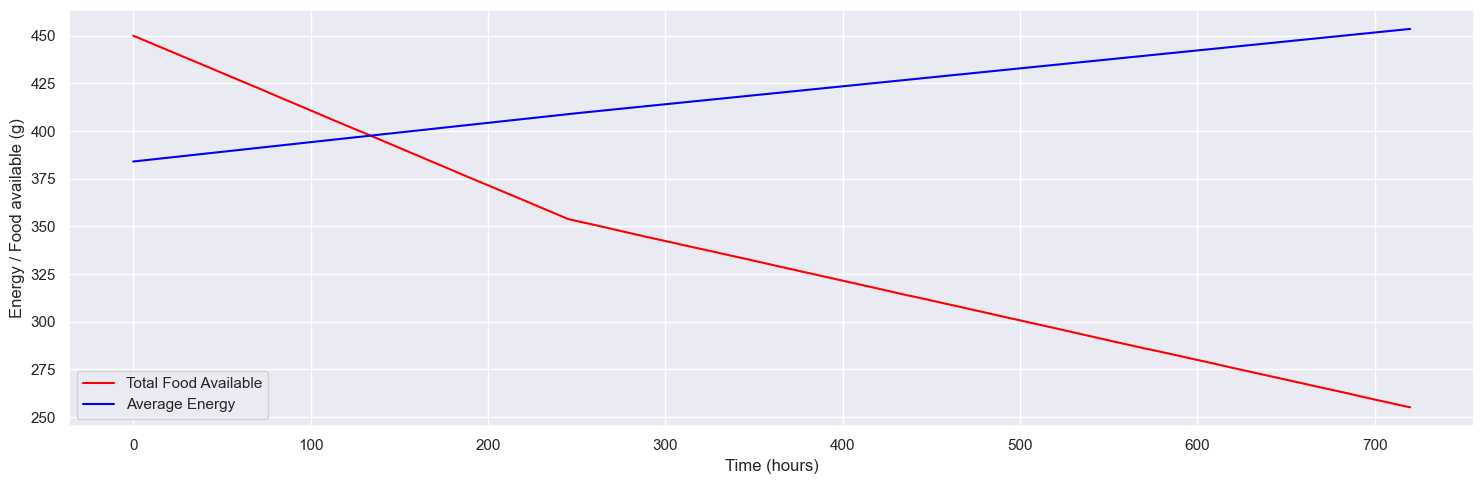

In [22]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot()
sns.lineplot(data=truncated_df_3, x='Step', y='TotalFoodAvailable', color='red', ax=ax, label='Total Food Available')
sns.lineplot(data=truncated_df_3, x='Step', y='AvgEnergy', color='blue', ax=ax, label='Average Energy')
plt.xlabel('Time (hours)')
plt.ylabel('Energy / Food available (g)')
plt.tight_layout()
plt.legend()
 
plt.savefig('plots/exp3-Environment-3.pdf')

In [23]:
min_energy_3 = truncated_df_3['AvgEnergy'].min()
max_energy_3 = truncated_df_3['AvgEnergy'].max()
print(f'Min energy: {min_energy_3}')
print(f'Max energy: {max_energy_3}')
coeff_3 = (max_energy_3 - min_energy_3) / 30
print(f'Coefficient: {coeff_3}')

Min energy: 384.0028
Max energy: 453.5499
Coefficient: 2.3182366666666665


In [24]:
expected_coeff = 2.058329999999999
print(f'Expected coefficient: {expected_coeff}')
print(f'Coefficient difference: {new_feedingrate - (coeff_3 - expected_coeff) * new_feedingrate}')

Expected coefficient: 2.058329999999999
Coefficient difference: 7.291930661965924e-05
